#üìå Extrac√£o

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(url)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transforma√ß√£o

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [6]:
df.iloc[0]

customerID                                           0002-ORFBO
Churn                                                        No
customer      {'gender': 'Female', 'SeniorCitizen': 0, 'Part...
phone            {'PhoneService': 'Yes', 'MultipleLines': 'No'}
internet      {'InternetService': 'DSL', 'OnlineSecurity': '...
account       {'Contract': 'One year', 'PaperlessBilling': '...
Name: 0, dtype: object

In [7]:
df = pd.json_normalize(df.to_dict(orient= 'records'))
df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [8]:
df.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

In [9]:
df.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [11]:
colunas_relevantes = [
    'customerID',
    'Churn',
    'customer.SeniorCitizen',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

In [12]:
df_relevantes = df[colunas_relevantes].copy()
df_relevantes.head()

customerID Churn  customer.SeniorCitizen  account.Charges.Monthly  \
0  0002-ORFBO    No                       0                     65.6   
1  0003-MKNFE    No                       0                     59.9   
2  0004-TLHLJ   Yes                       0                     73.9   
3  0011-IGKFF   Yes                       1                     98.0   
4  0013-EXCHZ   Yes                       1                     83.9   

  account.Charges.Total  
0                 593.3  
1                 542.4  
2                280.85  
3               1237.85  
4                 267.4

In [13]:
df_relevantes.isnull().sum()

customerID                 0
Churn                      0
customer.SeniorCitizen     0
account.Charges.Monthly    0
account.Charges.Total      0
dtype: int64

In [14]:
df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
def verificar_unique(df):
  for coluna in df.columns:
    try:
        unicos = pd.unique(df[coluna])
        print(f"Coluna: {coluna}")
        print(f"Valores √∫nicos: {unicos}\n")
    except Exception as e:
        print(f"Erro na coluna {coluna}: {e}")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [18]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors= 'coerce')

In [19]:
df['account.Charges.Total'].dtype

dtype('float64')

In [20]:
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(bool)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [22]:
df['Churn'] = df['Churn'].replace('', np.nan)

In [23]:
df['Churn'].isnull().sum()

np.int64(224)

In [24]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [25]:
df['Churn'].unique()

array([ 0.,  1., nan])

In [26]:
verificar_unique(df)

Coluna: customerID
Valores √∫nicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
Valores √∫nicos: [ 0.  1. nan]

Coluna: customer.gender
Valores √∫nicos: ['Female' 'Male']

Coluna: customer.SeniorCitizen
Valores √∫nicos: [False  True]

Coluna: customer.Partner
Valores √∫nicos: ['Yes' 'No']

Coluna: customer.Dependents
Valores √∫nicos: ['Yes' 'No']

Coluna: customer.tenure
Valores √∫nicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: phone.PhoneService
Valores √∫nicos: ['Yes' 'No']

Coluna: phone.MultipleLines
Valores √∫nicos: ['No' 'Yes' 'No phone service']

Coluna: internet.InternetService
Valores √∫nicos: ['DSL' 'Fiber optic' 'No']

Coluna: internet.OnlineSecurity
Valores √∫nicos: ['No' 'Yes' 'No internet service']

Coluna: internet.OnlineBackup

In [27]:
df['contas_diarias'] = (df['account.Charges.Monthly']/30).round(2)

In [28]:
df.head()

customerID  Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    0.0          Female                   False              Yes   
1  0003-MKNFE    0.0            Male                   False               No   
2  0004-TLHLJ    1.0            Male                   False               No   
3  0011-IGKFF    1.0            Male                    True              Yes   
4  0013-EXCHZ    1.0          Female                    True              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges.Monthly account.Charges.Total  contas_diarias  
0                    65.6                593.30            2.19  
1                    59.9                542.40            2.00  
2                    73.9                280.85            2.46  
3                    98.0               1237.85            3.27  
4                    83.9                267.40            2.80  

[5 rows x 22 columns]

In [29]:
df.set_index('customerID', inplace= True)

In [30]:
df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'evadiu',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'tem_parceiro',
    'customer.Dependents': 'tem_dependentes',
    'customer.tenure': 'meses_com_empresa',
    'phone.PhoneService': 'tem_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'valor_total'
}, inplace=True)

In [31]:
df.head()

evadiu  genero  idoso tem_parceiro tem_dependentes  \
customerID                                                       
0002-ORFBO     0.0  Female  False          Yes             Yes   
0003-MKNFE     0.0    Male  False           No              No   
0004-TLHLJ     1.0    Male  False           No              No   
0011-IGKFF     1.0    Male   True          Yes              No   
0013-EXCHZ     1.0  Female   True          Yes              No   

            meses_com_empresa tem_telefone multiplas_linhas tipo_internet  \
customerID                                                                  
0002-ORFBO                  9          Yes               No           DSL   
0003-MKNFE                  9          Yes              Yes           DSL   
0004-TLHLJ                  4          Yes               No   Fiber optic   
0011-IGKFF                 13          Yes               No   Fiber optic   
0013-EXCHZ                  3          Yes               No   Fiber optic   

           seguranca_online  ... protecao_dispositivo suporte_tecnico  \
customerID                   ...                                        
0002-ORFBO               No  ...                   No             Yes   
0003-MKNFE               No  ...                   No              No   
0004-TLHLJ               No  ...                  Yes              No   
0011-IGKFF               No  ...                  Yes              No   
0013-EXCHZ               No  ...                   No             Yes   

           streaming_tv streaming_filmes   tipo_contrato fatura_digital  \
customerID                                                                
0002-ORFBO          Yes               No        One year            Yes   
0003-MKNFE           No              Yes  Month-to-month             No   
0004-TLHLJ           No               No  Month-to-month            Yes   
0011-IGKFF          Yes              Yes  Month-to-month            Yes   
0013-EXCHZ          Yes               No  Month-to-month            Yes   

            metodo_pagamento valor_mensal  valor_total  contas_diarias  
customerID                                                              
0002-ORFBO      Mailed check         65.6       593.30            2.19  
0003-MKNFE      Mailed check         59.9       542.40            2.00  
0004-TLHLJ  Electronic check         73.9       280.85            2.46  
0011-IGKFF  Electronic check         98.0      1237.85            3.27  
0013-EXCHZ      Mailed check         83.9       267.40            2.80  

[5 rows x 21 columns]

In [32]:
df_evadiu = df[df['evadiu'] == 1]


In [33]:
df_genero = df_evadiu['genero'].map({'Male': 1, 'Female': 0})
df_genero.value_counts()

genero
0    939
1    930
Name: count, dtype: int64

In [34]:
df_evadiu['metodo_pagamento'].sort_values()

customerID
4818-DRBQT    Bank transfer (automatic)
8111-RKSPX    Bank transfer (automatic)
4322-RCYMT    Bank transfer (automatic)
8166-ZZTFS    Bank transfer (automatic)
8168-UQWWF    Bank transfer (automatic)
                        ...            
3668-QPYBK                 Mailed check
3669-LVWZB                 Mailed check
1571-SAVHK                 Mailed check
5922-ABDVO                 Mailed check
5747-PMBSQ                 Mailed check
Name: metodo_pagamento, Length: 1869, dtype: object

In [67]:
df['genero'].value_counts()

genero
Male      3675
Female    3592
Name: count, dtype: int64

#üìä Carga e an√°lise

In [35]:
df.describe()

evadiu  meses_com_empresa  valor_mensal  valor_total  \
count  7043.000000        7267.000000   7267.000000  7256.000000   
mean      0.265370          32.346498     64.720098  2280.634213   
std       0.441561          24.571773     30.129572  2268.632997   
min       0.000000           0.000000     18.250000    18.800000   
25%       0.000000           9.000000     35.425000   400.225000   
50%       0.000000          29.000000     70.300000  1391.000000   
75%       1.000000          55.000000     89.875000  3785.300000   
max       1.000000          72.000000    118.750000  8684.800000   

       contas_diarias  
count     7267.000000  
mean         2.157292  
std          1.004407  
min          0.610000  
25%          1.180000  
50%          2.340000  
75%          2.995000  
max          3.960000

In [36]:
sns.set_theme(style= 'dark')

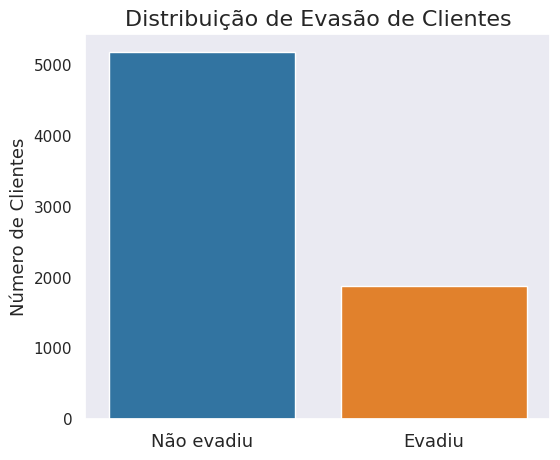

In [37]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.countplot(data=df, x='evadiu', hue='evadiu', palette='tab10', legend=False)
ax.set_title('Distribui√ß√£o de Evas√£o de Clientes', fontsize= 16)
ax.set_xticks([0, 1])
ax.set_xticklabels(['N√£o evadiu', 'Evadiu'], fontsize= 13)
ax.set_xlabel('')
ax.set_ylabel('N√∫mero de Clientes', fontsize= 13)

plt.show()

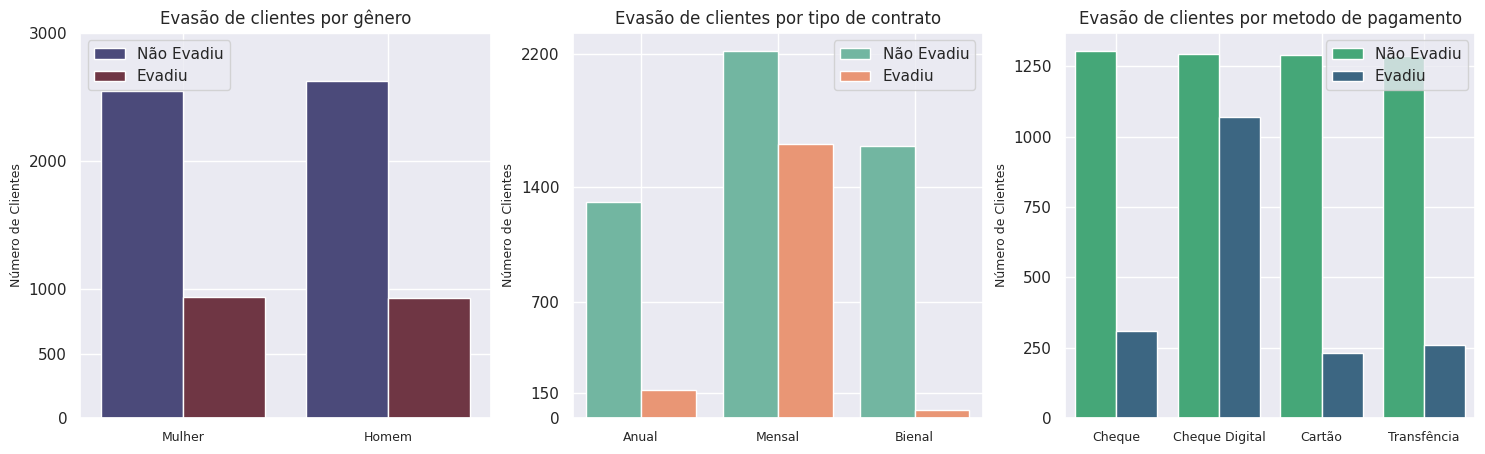

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(data=df, x='genero', hue='evadiu', palette='icefire', ax=axs[0])
axs[0].set_title('Evas√£o de clientes por g√™nero', fontsize=12)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Mulher', 'Homem'], fontsize=9)
axs[0].set_xlabel('')
axs[0].set_yticks([0, 500, 1000, 2000, 3000])
axs[0].set_ylabel('N√∫mero de Clientes', fontsize=9)
axs[0].grid(True)
axs[0].legend(labels= ('N√£o Evadiu', 'Evadiu'))



##2¬∫ Gr√°fico - Tipo de Contrato
sns.countplot(data=df, x='tipo_contrato', hue='evadiu', palette='Set2', legend=False, ax=axs[1])
axs[1].set_title('Evas√£o de clientes por tipo de contrato', fontsize= 12)
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(['Anual', 'Mensal', 'Bienal'], fontsize= 9)
axs[1].set_xlabel('')
axs[1].set_yticks([0, 150, 700, 1400, 2200])
axs[1].set_ylabel('N√∫mero de Clientes', fontsize= 9)
axs[1].grid(True)
axs[1].legend(labels= ('N√£o Evadiu', 'Evadiu'))

##3¬∫ Gr√°fico - Met√≥do de Pagamento
sns.countplot(data=df, x='metodo_pagamento', hue='evadiu', palette='viridis_r', legend=False, ax=axs[2])
axs[2].set_title('Evas√£o de clientes por metodo de pagamento', fontsize= 12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(['Cheque', 'Cheque Digital', 'Cart√£o' , 'Transf√™ncia'], fontsize= 9)
axs[2].set_xlabel('')
axs[2].set_yticks([0, 250, 500, 750, 1000, 1250])
axs[2].set_ylabel('N√∫mero de Clientes', fontsize= 9)
axs[2].grid(True)
axs[2].legend(labels= ('N√£o Evadiu', 'Evadiu'))


plt.show()



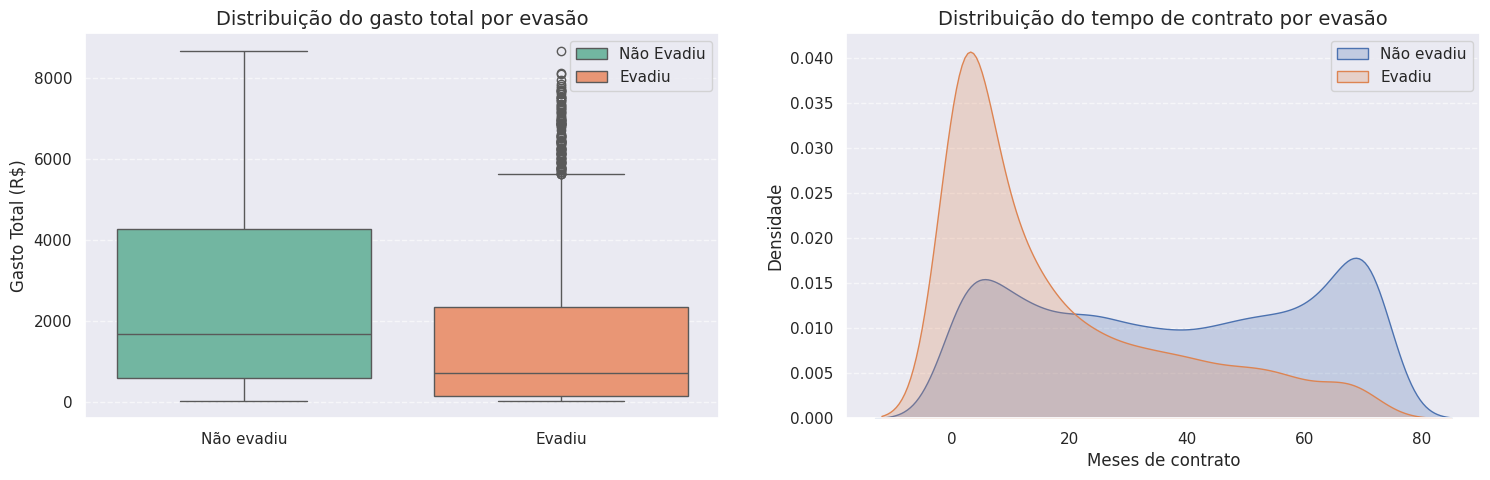

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(18,5))

##1¬∫ Gr√°fico - G√™nero
sns.boxplot(data=df, x='evadiu', y='valor_total', hue='evadiu', palette='Set2', ax=axs[0])
axs[0].set_xticks([0, 1], ['N√£o evadiu', 'Evadiu'])
axs[0].set_title('Distribui√ß√£o do gasto total por evas√£o', fontsize=14)
axs[0].set_xlabel('')
axs[0].set_ylabel('Gasto Total (R$)', fontsize=12)
axs[0].grid(True, axis='y', linestyle='--', alpha=0.6)
axs[0].legend(labels= ('N√£o Evadiu', 'Evadiu'))


##2¬∫ Gr√°fico - Tipo de Contrato
sns.kdeplot(data=df[df['evadiu'] == 0], x='meses_com_empresa', label='N√£o evadiu', fill=True, ax=axs[1])
sns.kdeplot(data=df[df['evadiu'] == 1], x='meses_com_empresa', label='Evadiu', fill=True, ax=axs[1])
axs[1].set_title('Distribui√ß√£o do tempo de contrato por evas√£o', fontsize=14)
axs[1].set_xlabel('Meses de contrato', fontsize=12)
axs[1].set_ylabel('Densidade', fontsize=12)
axs[1].legend()
axs[1].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.show()

#üìÑRelatorio Final

#Introdu√ß√£o
O objetivo deste projeto √© analisar os dados de clientes de uma empresa de telecomunica√ß√µes com foco em entender o fen√¥meno da evas√£o de clientes, tamb√©m chamado de churn.
Essa an√°lise √© essencial para identificar padr√µes de comportamento que levam clientes a cancelar seus servi√ßos e, a partir disso, propor estrat√©gias para reten√ß√£o.

A evas√£o representa perdas financeiras e indica poss√≠veis falhas no atendimento, nos planos oferecidos ou na experi√™ncia do usu√°rio.

#Limpeza e Tratamento de Dados
Para tornar os dados adequados √† an√°lise, foram realizados os seguintes passos:

-Importa√ß√£o dos dados JSON via API.

-Renomea√ß√£o de colunas para nomes mais leg√≠veis e em portugu√™s.

-Convers√£o de tipos de dados, como transformar colunas de valores em float ou int, quando necess√°rio.

-Tratamento de valores ausentes (NaN) com pd.to_numeric(..., errors='coerce') e elimina√ß√£o ou imputa√ß√£o quando necess√°rio.

-Mapeamento de vari√°veis categ√≥ricas como evas√£o (Evadiu = 1, Permaneceu = 0).

-Cria√ß√£o de colunas auxiliares, como tempo de contrato, tipo de pagamento, entre outras.

#An√°lise Explorat√≥ria de Dados (EDA)

Foi analisada a propor√ß√£o de clientes que evadiram e os que permaneceram. Gr√°ficos de barras mostraram a presen√ßa significativa de evas√£o em determinadas categorias.

1 - Evas√£o por vari√°veis categ√≥ricas

*G√™nero

*Tipo de contrato

*M√©todo de pagamento

2 - Evas√£o por vari√°veis num√©ricas

*Tempo de perman√™ncia (tenure)

*Total gasto

#Conclus√µes e Insights

Conclus√µes Gerais da An√°lise de Evas√£o de Clientes (Churn)

1 - G√™nero:

*Apesar da quantidade de clientes homens ser ligeiramente superior, mulheres apresentaram uma taxa de evas√£o levemente maior.

*A diferen√ßa, no entanto, √© quase impercept√≠vel, indicando que o g√™nero n√£o √© um fator decisivo de evas√£o, mas ainda assim pode ser considerado em estrat√©gias personalizadas.

2 - Tipo de Contrato:

*O tipo de contrato mensal √© o mais popular entre os clientes.

*No entanto, tamb√©m √© o que apresenta maior taxa de evas√£o, tanto em n√∫meros absolutos quanto percentuais.

*Contratos anuais e bienais possuem uma taxa de evas√£o muito menor, com o bienal sendo praticamente nulo em evas√£o.

3 - M√©todo de Pagamento:

*A distribui√ß√£o entre m√©todos de pagamento √© relativamente equilibrada.

*No entanto, clientes que usam ‚Äúcheque eletr√¥nico (electronic check)‚Äù t√™m uma taxa de evas√£o bem superior aos demais m√©todos, como cart√£o de cr√©dito e d√©bito autom√°tico.

4 - Tempo de Contrato (Meses):

*Clientes com menos de 10 meses de contrato concentram a maior taxa de evas√£o.

*A taxa cai drasticamente a partir de 20 meses, e clientes com mais de 60 meses dificilmente evadem, indicando forte fideliza√ß√£o com o tempo.

5 - Gasto Total:

*Clientes que n√£o evadiram tendem a gastar muito mais ao longo do tempo.

*A mediana do gasto entre os que permanecem √© significativamente mais alta.

*Clientes que evadem geralmente gastam pouco antes de sair ‚Äî possivelmente por evadirem logo no in√≠cio do relacionamento com a empresa.

#Sugest√µes com Base nas Conclus√µes

1 - Fortalecer Programas de Reten√ß√£o nos Primeiros Meses:

*Criar campanhas de onboarding mais eficazes para os primeiros 6 meses.

*Oferecer b√¥nus ou benef√≠cios progressivos nos primeiros meses para estimular perman√™ncia at√© o cliente alcan√ßar o ‚Äúponto de fideliza√ß√£o‚Äù.

2 - Incentivar Contratos de Longo Prazo:

*Oferecer descontos, vantagens ou brindes para migra√ß√£o de contratos mensais para anuais ou bienais.

*Demonstrar claramente os benef√≠cios financeiros e de estabilidade dos planos longos.

3 - Monitorar Clientes com Pagamento via Cheque Eletr√¥nico:

*Aplicar a√ß√µes espec√≠ficas para clientes com esse m√©todo de pagamento, como:

*Migrar para d√©bito autom√°tico ou cart√£o de cr√©dito.

*Avaliar se esse m√©todo est√° associado a maior inadimpl√™ncia ou menor engajamento.

4 - Segmentar Ofertas por Perfil de Gasto:

*Clientes que gastam mais tendem a ser mais fi√©is ‚Äî considere oferecer planos personalizados, exclusivos ou com recompensas para esse p√∫blico.

*Para os de menor gasto, estudar se h√° barreiras de entrada, como complexidade de servi√ßos ou custo-benef√≠cio percebido.